# Finance Project

### Data Description :
The file Bank.xis contains data on 5000 customers.The data include customer demographic information (age,income,etc.),the customer's relationship 
with the bank (mortgage,securities account,etc.)and the customer response to the last personal loan campaign (Personal Loan).Among these 5000 
customers,only 480(=9.6%) accepted the personal loan that was offered to them in the earlier campaign.

### Context :
This case is about a bank (There Bank) whose management wants to explore ways of converting its liability customers to personal
loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a
healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better
target marketing to increase the success ratio with minimal budget.



In [70]:
import pandas as pd

In [71]:
import numpy as np

In [72]:
import seaborn as sns
import plotly.express as ps

In [140]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

In [74]:
df=pd.read_csv('Bank_loan.csv')
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,-0.538229,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,-0.864109,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,-1.363793,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,0.569765,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,-0.625130,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,-0.733757,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,-1.276892,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,-1.081363,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,-0.538229,90034,3,0.5,2,0,0,0,0,1,0


In [75]:
df.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,-0.538229,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,-0.864109,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,-1.363793,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,0.569765,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,-0.625130,91330,4,1.0,2,0,0,0,0,0,1


In [76]:
df.shape

(5000, 14)

In [77]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [78]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [79]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,1.435296e-16,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,1.000100e+00,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,-1.428969e+00,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,-7.554825e-01,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,-2.123482e-01,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,5.263146e-01,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,3.263712e+00,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [80]:
df.index

RangeIndex(start=0, stop=5000, step=1)

In [81]:
df.drop(['ID','ZIP Code'],axis=1,inplace=True)

In [82]:
df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   float64
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 468.9 KB


In [84]:
df.count

<bound method DataFrame.count of       Age  Experience    Income  Family  CCAvg  Education  Mortgage  \
0      25           1 -0.538229       4    1.6          1         0   
1      45          19 -0.864109       3    1.5          1         0   
2      39          15 -1.363793       1    1.0          1         0   
3      35           9  0.569765       1    2.7          2         0   
4      35           8 -0.625130       4    1.0          2         0   
...   ...         ...       ...     ...    ...        ...       ...   
4995   29           3 -0.733757       1    1.9          3         0   
4996   30           4 -1.276892       4    0.4          1        85   
4997   63          39 -1.081363       2    0.3          3         0   
4998   65          40 -0.538229       3    0.5          2         0   
4999   28           4  0.200434       3    0.8          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
0                 0                   1 

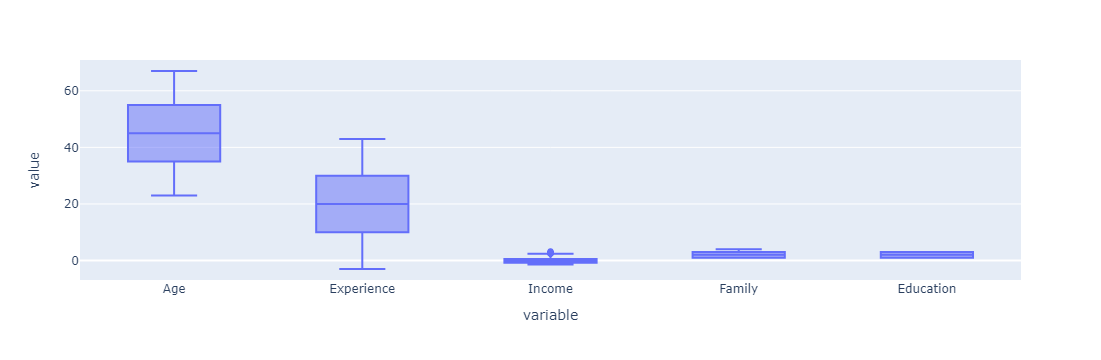

In [85]:
fig=ps.box(df,y=['Age','Experience','Income','Family','Education'])
fig.show()


In [86]:
df.dtypes

Age                     int64
Experience              int64
Income                float64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [87]:
df.skew()

Age                  -0.029341
Experience           -0.026325
Income                0.841339
Family                0.155221
CCAvg                 1.598443
Education             0.227093
Mortgage              2.104002
Personal Loan         2.743607
Securities Account    2.588268
CD Account            3.691714
Online               -0.394785
CreditCard            0.904589
dtype: float64

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Experience'}>,
        <Axes: title={'center': 'Income'}>],
       [<Axes: title={'center': 'Family'}>,
        <Axes: title={'center': 'CCAvg'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'Mortgage'}>,
        <Axes: title={'center': 'Personal Loan'}>,
        <Axes: title={'center': 'Securities Account'}>],
       [<Axes: title={'center': 'CD Account'}>,
        <Axes: title={'center': 'Online'}>,
        <Axes: title={'center': 'CreditCard'}>]], dtype=object)

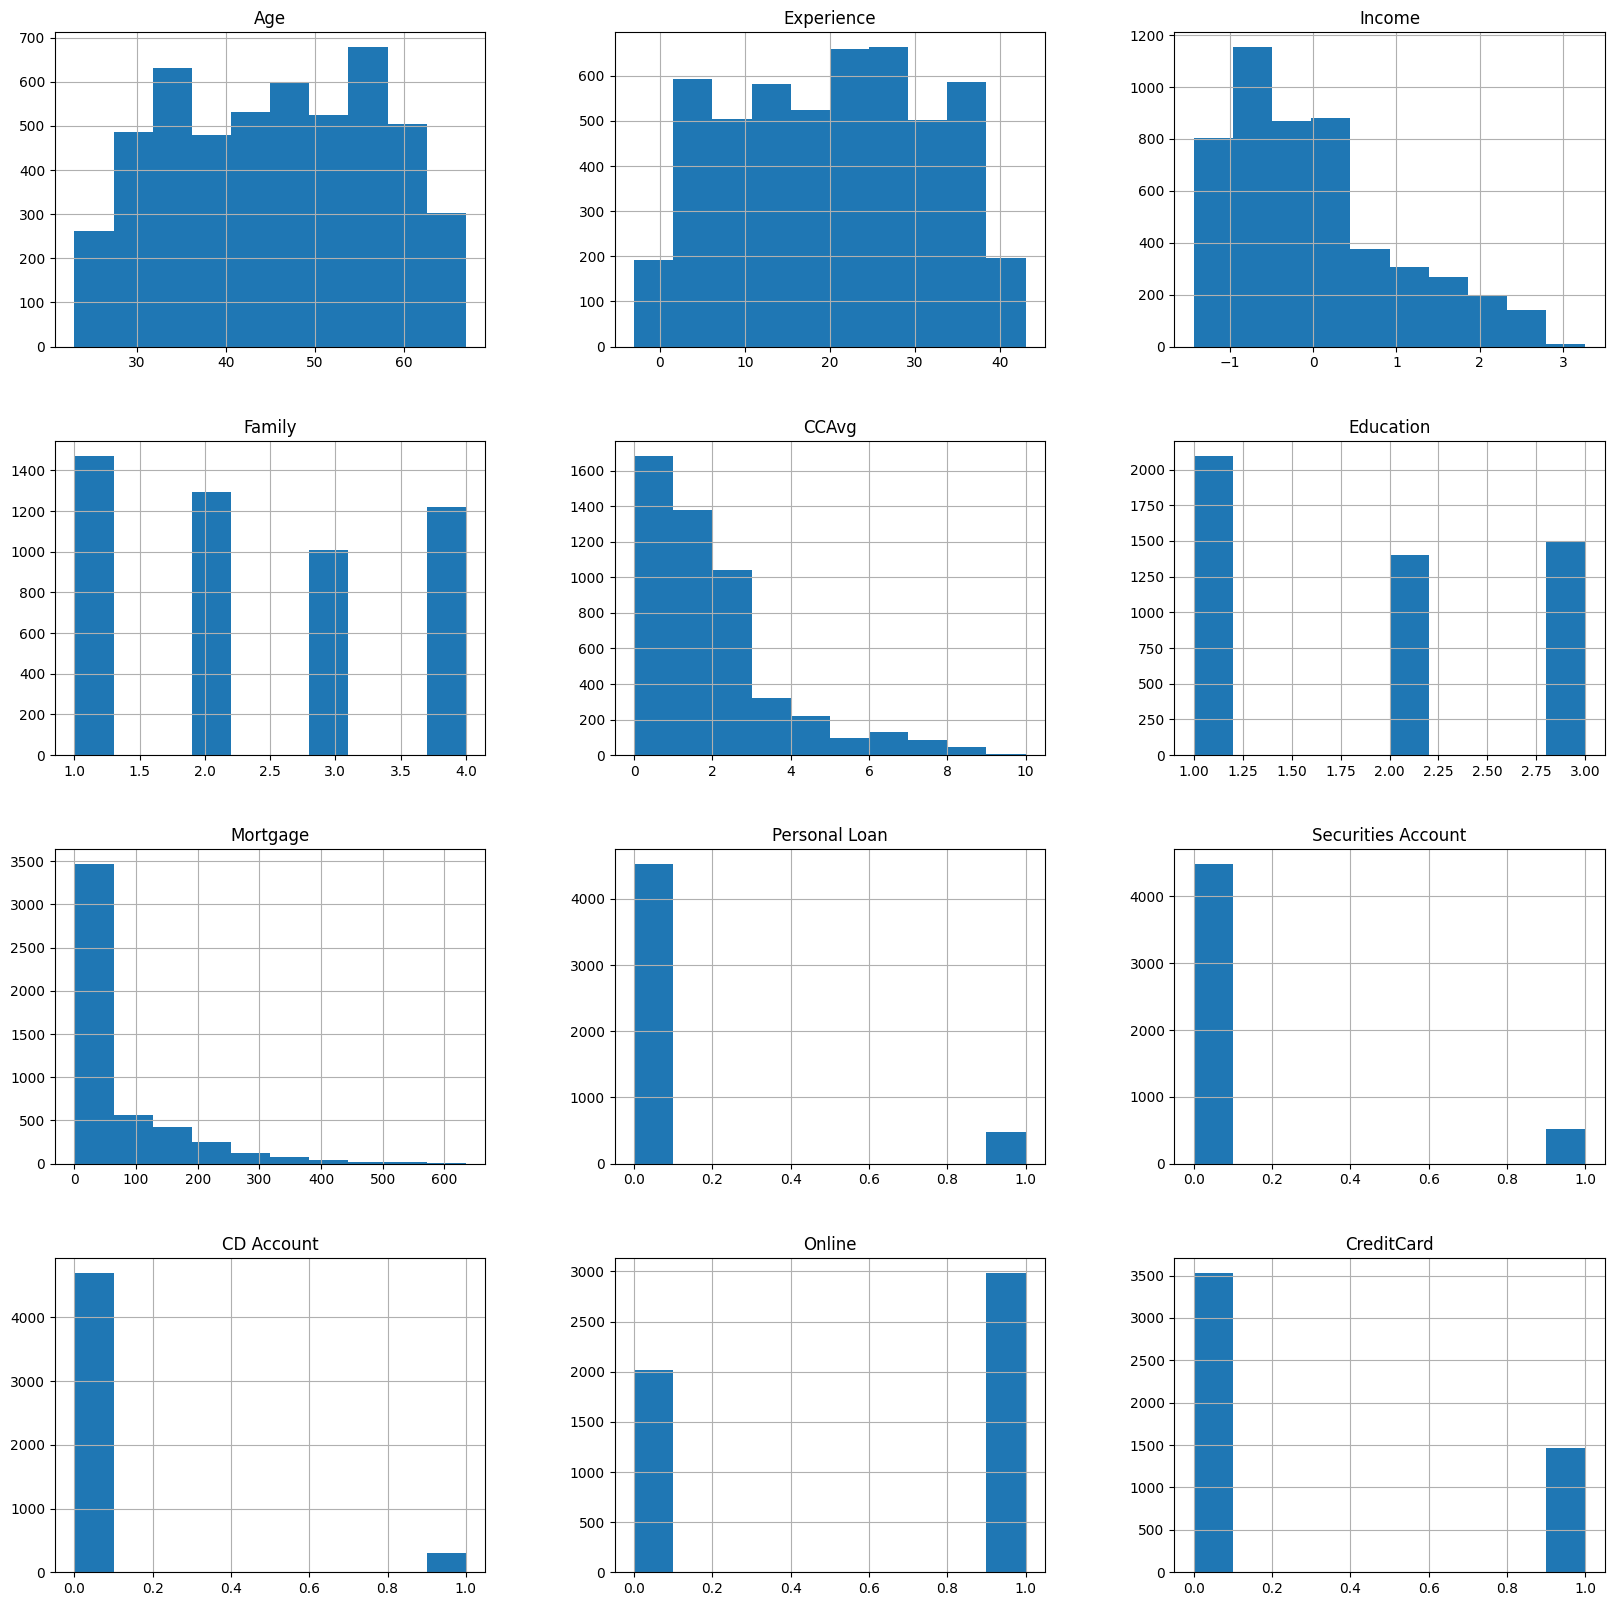

In [88]:
df.hist(figsize=(20,20))

C:\Users\HP G5\AppData\Local\Temp\ipykernel_13020\4088753809.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Experience', ylabel='Density'>

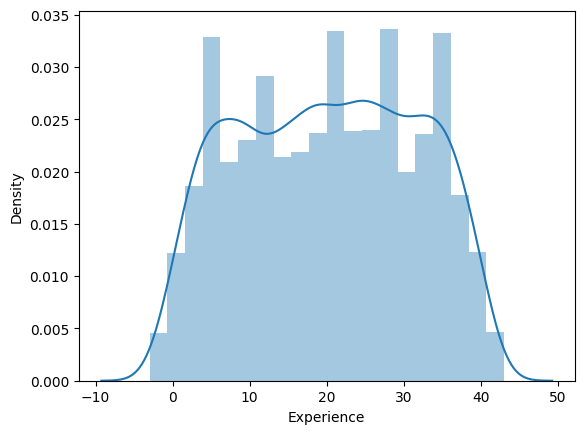

In [89]:
sns.distplot(df['Experience'])

In [90]:
df['Experience'].mean()

20.1046

In [91]:
negative_exp=df[df['Experience']<0]
negative_exp.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,25,-1,0.852195,4,2.30,3,0,0,0,0,0,1
226,24,-1,-0.755483,2,1.70,2,0,0,0,0,0,0
315,24,-2,-0.494778,3,0.30,3,0,0,0,0,1,0
451,28,-2,-0.559954,2,1.75,3,89,0,0,0,1,0
524,24,-1,0.026631,4,0.20,1,0,0,0,0,1,0


In [92]:
negative_exp.shape

(52, 12)

C:\Users\HP G5\AppData\Local\Temp\ipykernel_13020\3268055496.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Age', ylabel='Density'>

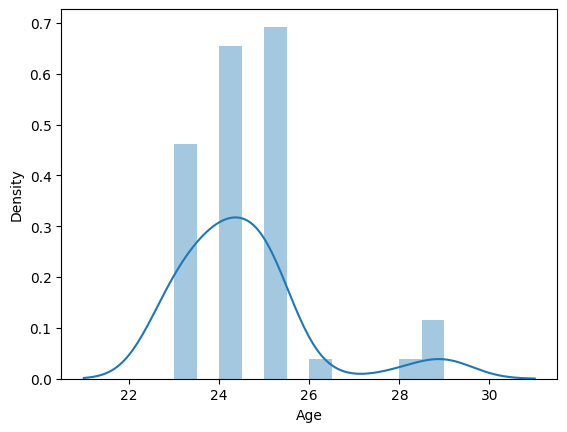

In [93]:
sns.distplot(negative_exp['Age'])

In [94]:
negative_exp['Experience'].mean()

-1.4423076923076923

In [95]:
negative_exp.size

624

In [173]:
print('There are {} records which has negative values for experience ,approx {} %'.format(negative_exp.size,((negative_exp.size/df.size)*100)))

There are 624 records which has negative values for experience ,approx 1.04 %


In [97]:
data=df.copy()

In [98]:
data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,-0.538229,4,1.6,1,0,0,1,0,0,0
1,45,19,-0.864109,3,1.5,1,0,0,1,0,0,0
2,39,15,-1.363793,1,1.0,1,0,0,0,0,0,0
3,35,9,0.569765,1,2.7,2,0,0,0,0,0,0
4,35,8,-0.625130,4,1.0,2,0,0,0,0,0,1


In [99]:
data.shape

(5000, 12)

In [100]:
data['Experience']=np.where(data['Experience']<0,data['Experience'].mean(),data['Experience'])

In [101]:
data[data['Experience']<0]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [102]:
data.corr()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.977008,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.977008,1.000000,-0.049054,-0.045488,-0.048708,0.018097,-0.013378,-0.014045,-0.000462,0.005502,0.013455,0.008833
Income,-0.055269,-0.049054,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.045488,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.048708,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.018097,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.013378,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.014045,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.000462,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.005502,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


<Axes: >

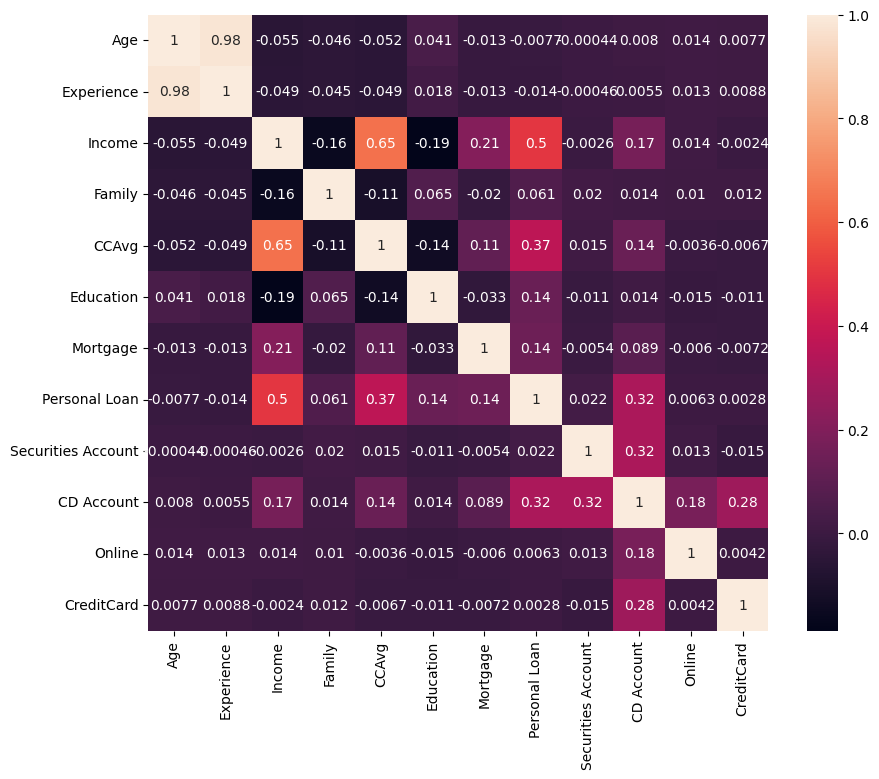

In [103]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True)

In [104]:
data=data.drop(['Experience'],axis=1)

In [105]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,-0.538229,4,1.6,1,0,0,1,0,0,0
1,45,-0.864109,3,1.5,1,0,0,1,0,0,0
2,39,-1.363793,1,1.0,1,0,0,0,0,0,0
3,35,0.569765,1,2.7,2,0,0,0,0,0,0
4,35,-0.625130,4,1.0,2,0,0,0,0,0,1


# Education

In [106]:
data['Education'].unique()

array([1, 2, 3], dtype=int64)

In [107]:
def experience(x):
    if x==1:
        return 'Undergrade'
    if x==2:
        return 'Graduate'
    if x==3:
        return 'Professional'

In [108]:
data['EDU']=data['Education'].apply(experience)

In [109]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,EDU
0,25,-0.538229,4,1.6,1,0,0,1,0,0,0,Undergrade
1,45,-0.864109,3,1.5,1,0,0,1,0,0,0,Undergrade
2,39,-1.363793,1,1.0,1,0,0,0,0,0,0,Undergrade
3,35,0.569765,1,2.7,2,0,0,0,0,0,0,Graduate
4,35,-0.625130,4,1.0,2,0,0,0,0,0,1,Graduate


In [110]:
data['EDU'].unique()

array(['Undergrade', 'Graduate', 'Professional'], dtype=object)

In [111]:
education_dis=data.groupby('EDU')['Age'].count()

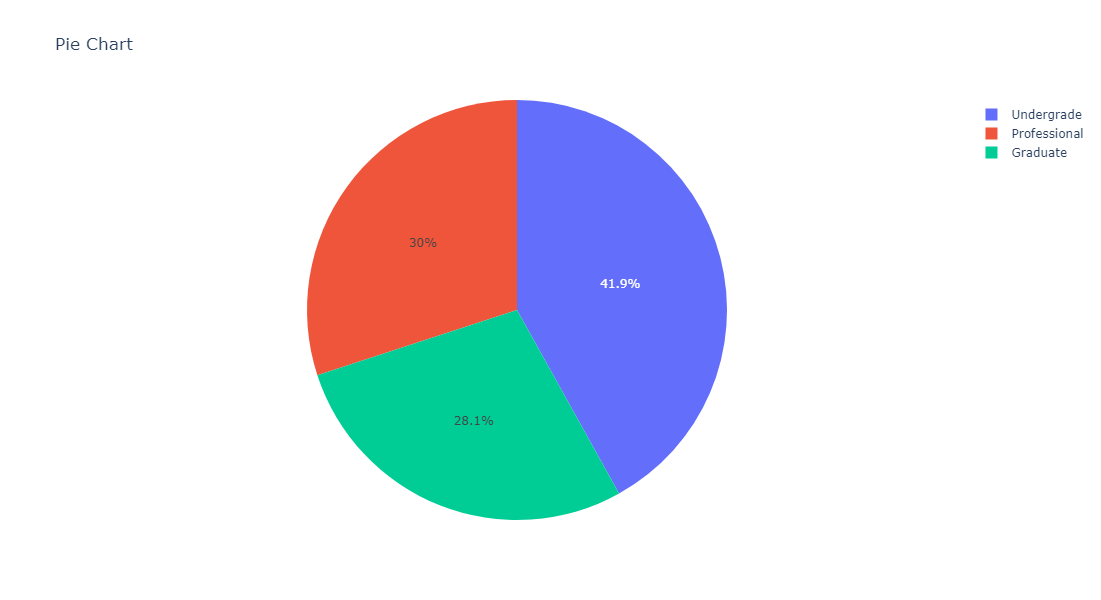

In [112]:

fig=ps.pie(data,values=education_dis,names=education_dis.index,title='Pie Chart')
fig.update_layout(height=600,width=600)
fig.show()

In [113]:
data.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'EDU'],
      dtype='object')

In [114]:
data['Income'].unique()

array([-0.53822878, -0.8641094 , -1.36379301,  0.56976533, -0.62513027,
       -0.97273627, -0.03854516, -1.12481389,  0.15698321,  2.3077953 ,
        0.6783922 ,  0.87392057, -0.73375715,  0.83046983,  1.22152657,
        2.59022517, -1.14653927, -1.05963777, -0.23407353, -0.25579891,
       -0.66858102,  1.69948481,  0.20043396,  1.82983706, -0.55995415,
        0.98254745, -0.84238402, -0.71203177, -1.21171539, -0.5165034 ,
        1.0259982 , -0.06027053,  1.46050569,  0.13525784,  0.22215934,
       -0.29924966,  1.26497732,  0.65666683, -0.47305265,  2.61195054,
       -1.42896914,  1.24325194,  2.52504905, -0.64685565,  1.41705494,
        0.41768771,  2.4815983 , -0.75548252,  1.1128997 , -0.90756014,
       -1.16826464,  0.89564595, -0.10372128,  0.24388471,  1.33015344,
       -1.34206764,  1.28670269, -1.18999001,  0.17870859,  0.7652937 ,
       -0.6903064 ,  0.09180709, -0.49477803,  0.8521952 ,  0.96082207,
       -0.21234816,  1.89501318,  0.43941308, -1.27689151,  0.00

In [115]:
data['Securities Account'].value_counts()

Securities Account
0    4478
1     522
Name: count, dtype: int64

In [116]:
data['CD Account'].value_counts()

CD Account
0    4698
1     302
Name: count, dtype: int64

In [117]:
def security(y):
    if(y['Securities Account']==1) & (y['CD Account']==1):
        return 'Holds Securities & Deposite'
    if(y['Securities Account']==0) & (y['CD Account']==0):
        return 'Does not Holds Securities & Deposite account'
    if(y['Securities Account']==1) & (y['CD Account']==0):
        return 'Holds only Securities account'
    if(y['Securities Account']==0) & (y['CD Account']==1):
        return 'Holds only Deposite account'
   

In [118]:
data['Account_holder_category']=data.apply(security , axis=1)

In [119]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,EDU,Account_holder_category
0,25,-0.538229,4,1.6,1,0,0,1,0,0,0,Undergrade,Holds only Securities account
1,45,-0.864109,3,1.5,1,0,0,1,0,0,0,Undergrade,Holds only Securities account
2,39,-1.363793,1,1.0,1,0,0,0,0,0,0,Undergrade,Does not Holds Securities & Deposite account
3,35,0.569765,1,2.7,2,0,0,0,0,0,0,Graduate,Does not Holds Securities & Deposite account
4,35,-0.625130,4,1.0,2,0,0,0,0,0,1,Graduate,Does not Holds Securities & Deposite account


In [120]:
values=data['Account_holder_category'].value_counts()
values.index

Index(['Does not Holds Securities & Deposite account',
       'Holds only Securities account', 'Holds only Deposite account',
       'Holds Securities & Deposite'],
      dtype='object', name='Account_holder_category')

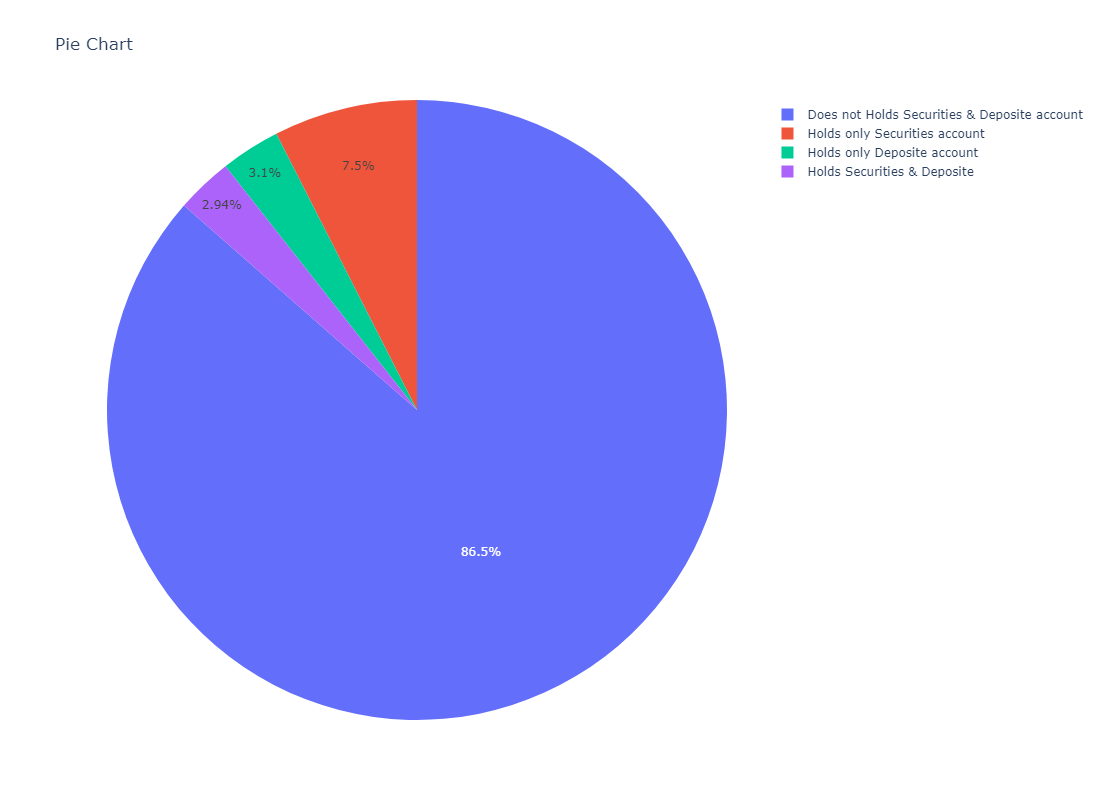

In [121]:
fig=ps.pie(values=values,names=values.index,title='Pie Chart')
fig.update_layout(height=800,width=800)
fig.show()



In [122]:
data.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'EDU', 'Account_holder_category'],
      dtype='object')

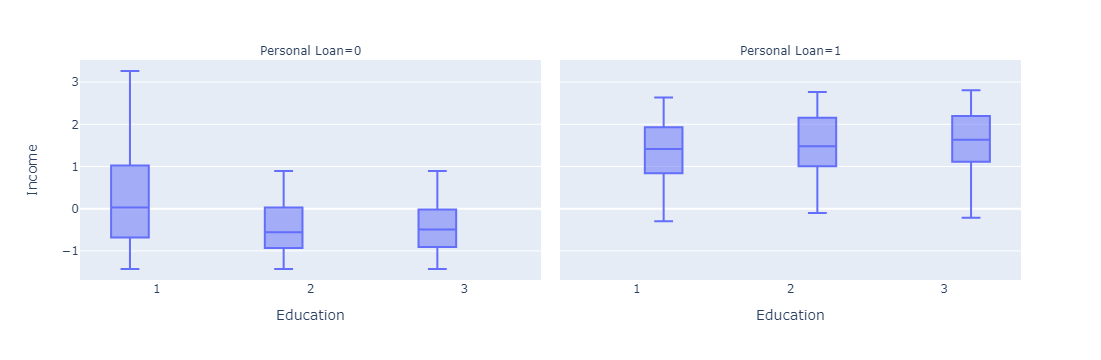

In [123]:
ps.box(data,x='Education',y='Income',facet_col='Personal Loan')


C:\Users\HP G5\AppData\Local\Temp\ipykernel_13020\3231698501.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\HP G5\AppData\Local\Temp\ipykernel_13020\3231698501.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




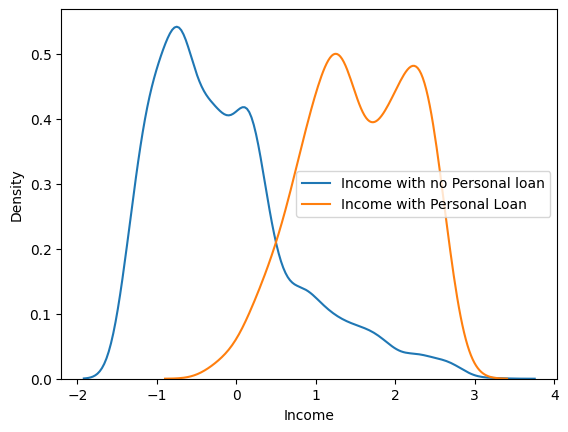

In [124]:
sns.distplot(data[data['Personal Loan']==0]['Income'],hist=False,label='Income with no Personal loan')
sns.distplot(data[data['Personal Loan']==1]['Income'],hist=False,label='Income with Personal Loan')
plt.legend()


In [125]:
def plot(col1,col2,label1,label2,title):
    sns.distplot(data[data[col2]==0][col1],hist=False,label=label1)
    sns.distplot(data[data[col2]==1][col1],hist=False,label=label2)
   
    plt.legend()
    plt.title(title)
    plt.show()
    

C:\Users\HP G5\AppData\Local\Temp\ipykernel_13020\3464208751.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\HP G5\AppData\Local\Temp\ipykernel_13020\3464208751.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




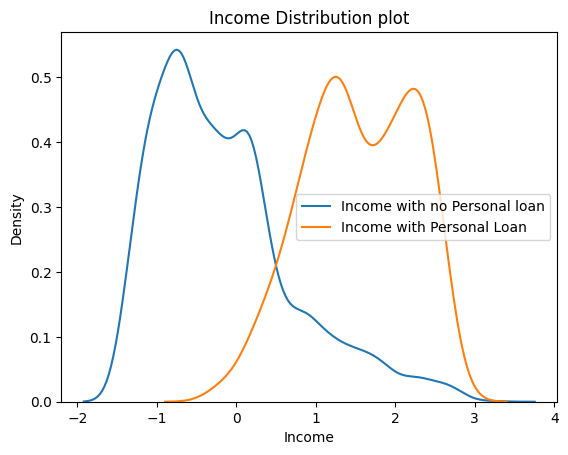

In [126]:
plot('Income', 'Personal Loan', 'Income with no Personal loan', 'Income with Personal Loan', 'Income Distribution plot')

C:\Users\HP G5\AppData\Local\Temp\ipykernel_13020\3464208751.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\HP G5\AppData\Local\Temp\ipykernel_13020\3464208751.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




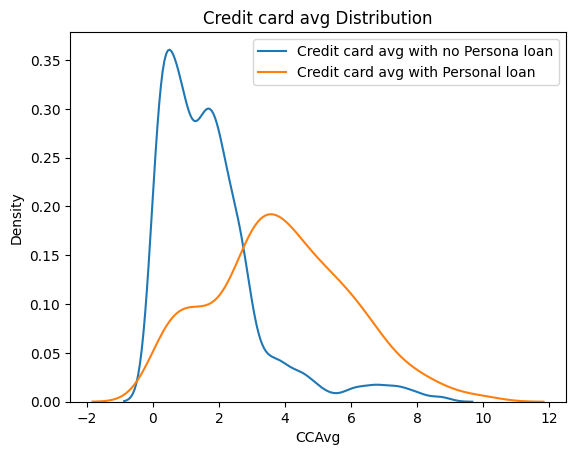

<function __main__.plot(col1, col2, label1, label2, title)>

In [127]:
plot('CCAvg','Personal Loan','Credit card avg with no Persona loan','Credit card avg with Personal loan','Credit card avg Distribution')
plot

In [128]:
data.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'EDU', 'Account_holder_category'],
      dtype='object')

In [129]:
col=['Securities Account','Online','Account_holder_category','CreditCard']

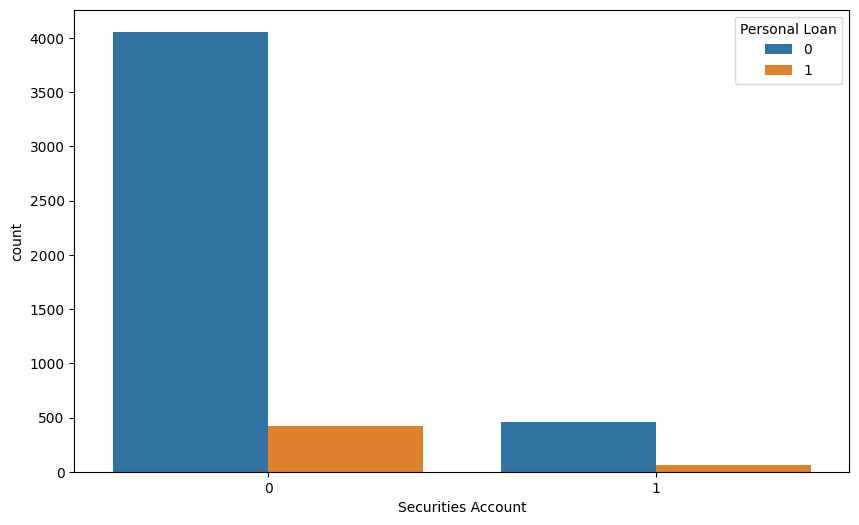

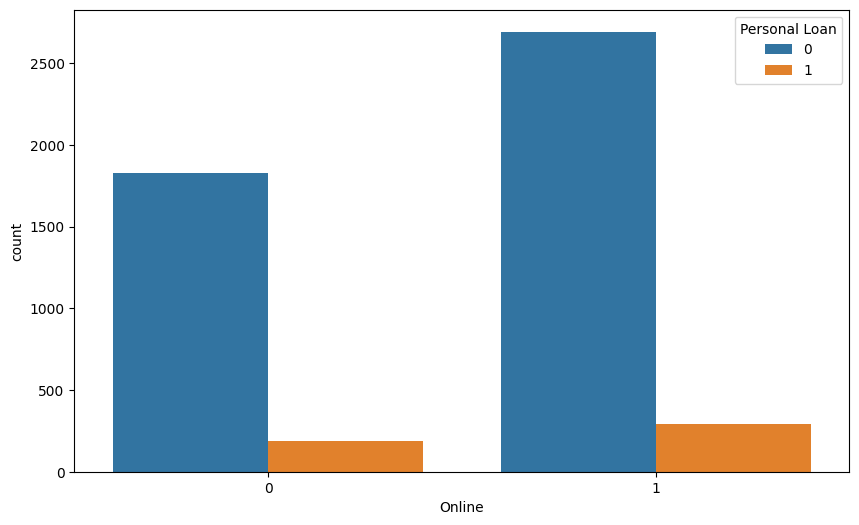

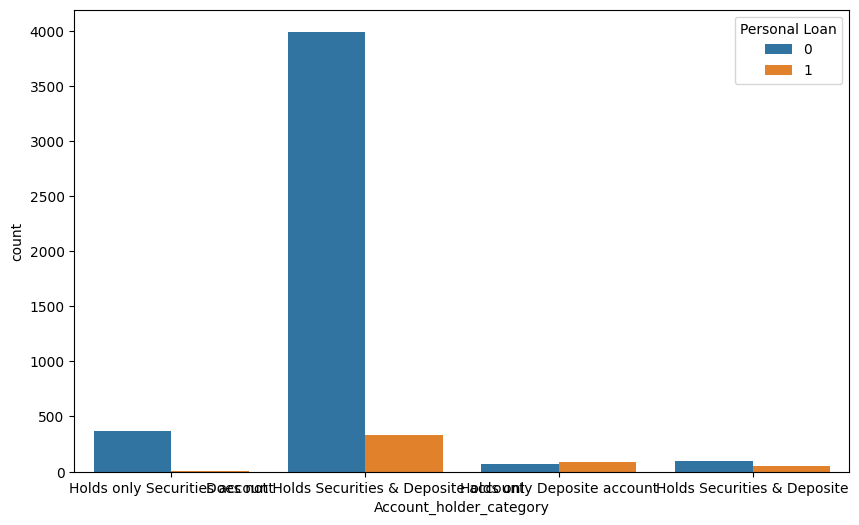

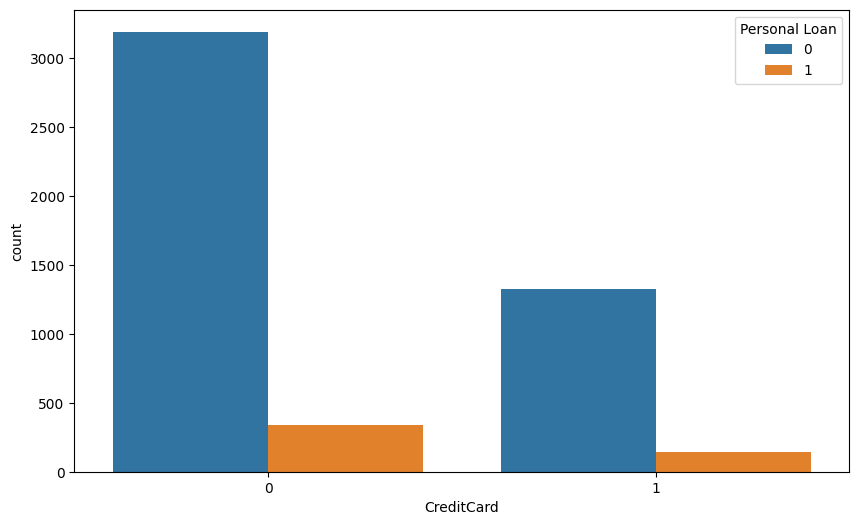

In [130]:
for i in col:
    plt.figure(figsize=(10,6))
    sns.countplot(x=i,data=data,hue='Personal Loan')

In [131]:
col=['Securities Account','Online','CreditCard']

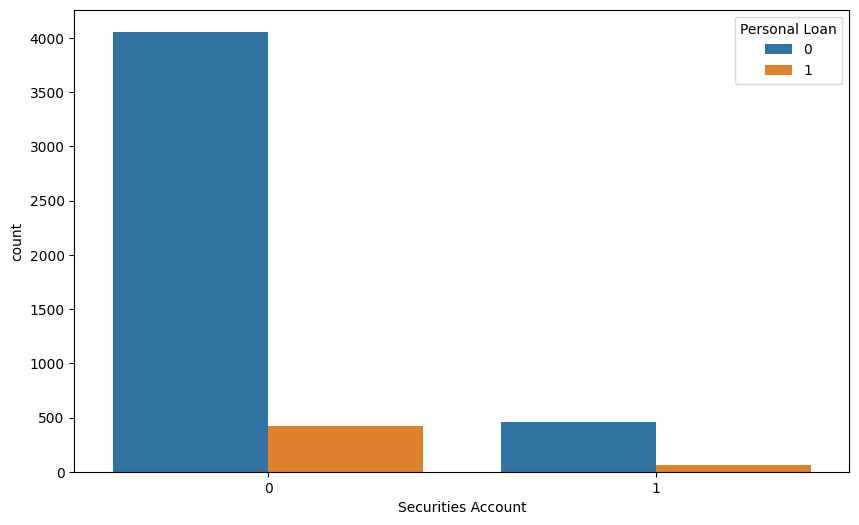

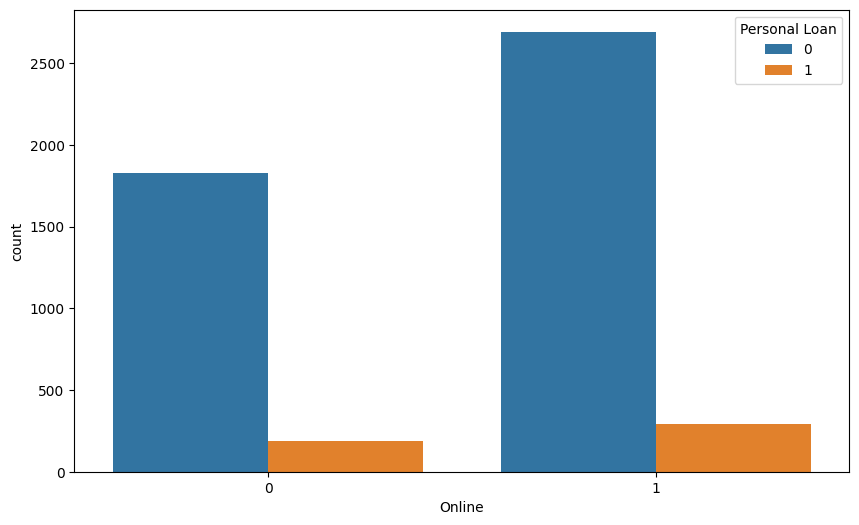

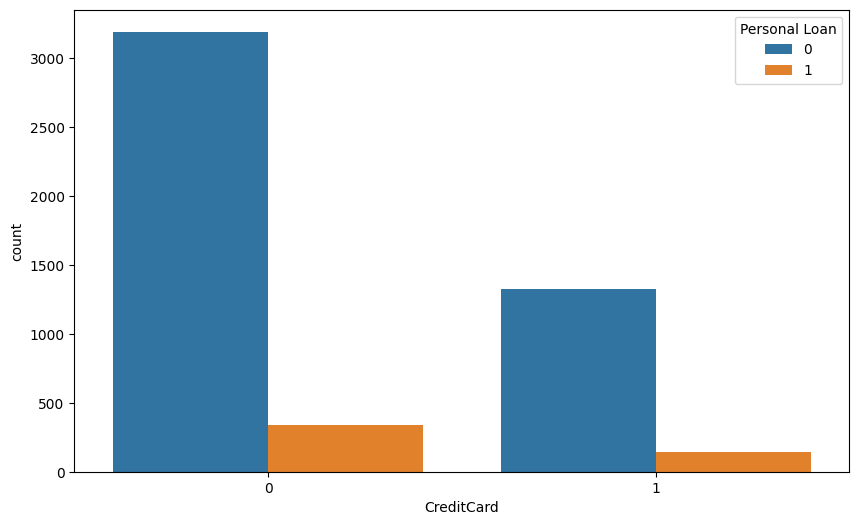

In [132]:
for i in col:
    plt.figure(figsize=(10,6))
    sns.countplot(x=i,data=data,hue='Personal Loan')

In [133]:
print(data.dtypes)

Age                          int64
Income                     float64
Family                       int64
CCAvg                      float64
Education                    int64
Mortgage                     int64
Personal Loan                int64
Securities Account           int64
CD Account                   int64
Online                       int64
CreditCard                   int64
EDU                         object
Account_holder_category     object
dtype: object


In [134]:
from scipy.stats import zscore

Age                   20.0
Income                59.0
Family                 2.0
CCAvg                  1.8
Education              2.0
Mortgage             101.0
Personal Loan          0.0
Securities Account     0.0
CD Account             0.0
Online                 1.0   
CreditCard             1.0
dtype:float64

In [136]:
#Log Normal Transform

data_1=data[['Income','CCAvg']]
data_1=np.log(data_1+1)
data_1

C:\Users\HP G5\AppData\Roaming\Python\Python311\site-packages\pandas\core\internals\blocks.py:366: RuntimeWarning:

invalid value encountered in log



,Income,CCAvg
0,-0.772686,0.955511
1,-1.995905,0.916291
2,NaN,0.693147
3,0.450926,1.308333
4,-0.981177,0.693147
...,...,...
4995,-1.323346,1.064711
4996,NaN,0.336472
4997,NaN,0.262364
4998,-0.772686,0.405465


In [137]:
# Power Transform
from sklearn.preprocessing import PowerTransformer

C:\Users\HP G5\AppData\Local\Temp\ipykernel_13020\129160051.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




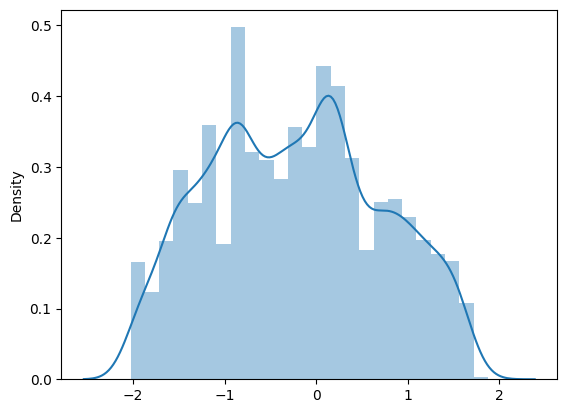

In [138]:
pt= PowerTransformer(method='yeo-johnson',standardize=False)
pt.fit(data['Income'].values.reshape(-1,1))
Income=pt.transform(data['Income'].values.reshape(-1,1))
sns.distplot(Income)
plt.show()

- Handle Outliers
-Convert Categortical into Numerical
- Data Fit
- Model building
- Logisitic,SVM